[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
0.7540983606557377
[0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0]
0.6721311475409836


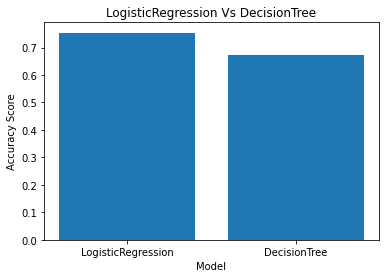

In [1]:
import pandas as pd
import numpy as np
import sklearn



heart_dis = pd.read_csv('heart disease classification dataset.csv')
heart_dis.head()

heart_dis.shape

heart_dis.isnull().sum()

heart_dis = heart_dis.drop(['Unnamed: 0'], axis =1)
heart_dis.shape

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['trestbps']])
heart_dis['trestbps'] = impute.transform(heart_dis[['trestbps']])

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['chol']])
heart_dis['chol'] = impute.transform(heart_dis[['chol']])

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['thalach']])
heart_dis['thalach'] = impute.transform(heart_dis[['thalach']])

heart_dis.isnull().sum()

heart_dis.head()

heart_dis['sex'].unique()

heart_dis['target'].unique()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
heart_dis['sex'] = encode.fit_transform(heart_dis['sex'])

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
heart_dis['target'] = encode.fit_transform(heart_dis['target'])

heart_dis.head()

from sklearn.model_selection import train_test_split

X = heart_dis.drop('target',axis = 1)
y = heart_dis['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
#X_train.shape
#X_test.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train
X_test = scaler.transform(X_test)
X_test

#Classification using logisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print(predictions)
score1 = accuracy_score(y_test, predictions)
print(score1)

#Classification using DecisionTree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf2 = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf2.fit(X_train,y_train)
predictions2 = clf2.predict(X_test)
score2 = accuracy_score(predictions2, y_test)
print(predictions2)
print(score2)

#Bar Chart using matplotlib

import matplotlib.pyplot as plt

score = [score1, score2]
model = ['LogisticRegression', 'DecisionTree']

plt.bar(model,score)
plt.title('LogisticRegression Vs DecisionTree')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()